#**Heart Attack Prediction**

##**Attributes**


Memiliki 14 atribut yang telah diseleksi dari 76 atribut. Atribut tersebut adalah:
*   age: Usia
*   sex: Jenis kelamin
  *   0: Laki-laki
  *   1: Perempuan
*   cp: Jenis sakit dada
  *   Nilai 1: angina khas
  *   Nilai 2: angina atipikal
  *   Nilai 3: nyeri non-angina
  *   Nilai 4: tanpa gejala
*   trestbps: Tekanan darah istirahat
*   chol: Kolestrol
*   fbs: Gula darah puasa
*   restecg: Electrocardiographic
  *   0: Normal
  *   1: Memiliki kelainan gelombang ST-T
  *   2: Menunjukkan hipertrofi ventrikel kiri yang mungkin atau pasti
  dengan kriteria Estes
*   thalach: Detak jantung maksimum
*   exang: Angina yang diinduksi oleh olahraga
  *   1: Ya
  *   0: Tidak
*   oldpeak: Mengukur tingkat depresi segmen ST yang terjadi selama latihan dibandingkan dengan saat istirahat.
*   slope: Mengindikasikan kemiringan segmen ST selama puncak latihan.
  *   1 (Upsloping): Cenderung lebih normal dan mengindikasikan prognosis yang lebih baik
  *   2 (Flat): Bisa mengindikasikan adanya iskemia
  *   3 (Downsloping): Terkait dengan risiko penyakit jantung yang lebih tinggi
*   ca: Menghitung jumlah pembuluh darah utama
*   thal: Menggambarkan kondisi perfusi miokard berdasarkan uji thalium
*   num: Label target
  *   0: Tidak
  *   1: Ya


##**Framework**

Menggunakan CRISP-DM (Cross Industry Standard Process of Data Mining) yang meliputi langkah:
1.   Business Understanding,
2.   Data Understanding
3.   Data Preparation,
4.   Modeling,
5.   Evaluation,
6.   Deployment

Namun, dalam penerapan kali ini, hanya langkah 1 dan 2 yang digunakan, sehingga tujuan bisnis akan disesuaikan tanpa mempertimbangkan potensi dampak.

Source: https://mmsi.binus.ac.id/2020/09/18/cross-industry-standard-process-for-data-mining-crisp-dm/

##**Purpose of EDA**

**Pertanyaan Bisnis**
1.   Apa faktor-faktor utama yang memengaruhi risiko serangan jantung berdasarkan data pasien?
2.   Apakah model prediktif dapat membantu dokter dalam mengidentifikasi pasien berisiko tinggi?
3.   Apakah data yang tersedia cukup untuk membangun model yang akurat?

##**Execution of EDA**

####Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

####Data Loading

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1Cf7_DgxXxw9QKAqxibEGNdGHiK5NteGL',na_values=['?'])

####Data Checking


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [ ]:
# Checking name of columns
columns_with_spaces = [col for col in df.columns if col != col.strip()]
df.columns = df.columns.str.strip()
print(df.columns)
print(f"Anomaly from name of columns is {columns_with_spaces}")
print(f"Success to replace with {df.columns}")

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Anomaly from name of columns is ['num       ']
Success to replace with Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# Information of dataset
display(HTML('<br><b>1. Information of Dataset:</b>'))
display(df.describe())
print(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB
None


In [ ]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

display(HTML('<b>2. Missing Values per Column:</b>'))
print(missing_summary)

          Missing Values  Percentage (%)
age                    0            0.00
sex                    0            0.00
cp                     0            0.00
trestbps               1            0.34
chol                  23            7.82
fbs                    8            2.72
restecg                1            0.34
thalach                1            0.34
exang                  1            0.34
oldpeak                0            0.00
slope                190           64.63
ca                   291           98.98
thal                 266           90.48
num                    0            0.00


**Checkpoint**
*   Dataframe memiliki **294 baris dan 14 kolom**
*   Tipe dataframe adalah integer dan float
*   Terdapat fitur yang **memiliki missing value cukup banyak (> 90%)** yaitu 'slope', 'ca', dan 'thal'. Rekomendasi missing value yang diharapkan adalah tidak lebih dari 10%.
*   Perubahan missing value '?' menjadi "Na" untuk mempermudah operasi matematika dan menghindari penetapan Dtypes menjadi object.
*   Perbaikan nama kolom 'sum' yang sebelumnya memiliki spasi terlalu banyak diakhir
*   Data yang memiliki tipe number memiliki variasi cukup besar namun masih tergolong aman. Tidak yang terlalu berlebihan (outliers terlalu banyak). Hal ini diukur dari perbandingan (std / mean) * 100

####Data Analysis

num
0    188
1    106
Name: count, dtype: int64


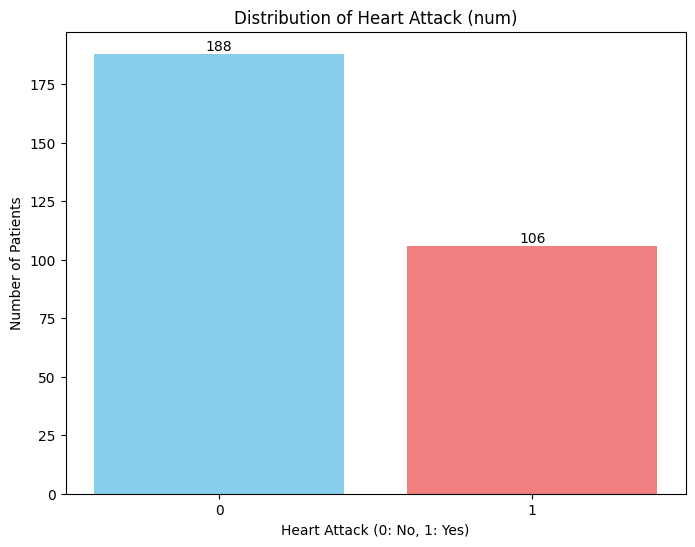

In [ ]:
# Distribute of target feature
print(df['num'].value_counts())

# Get the values and counts for the bar chart
values = df['num'].value_counts().index
counts = df['num'].value_counts().values

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(values, counts, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Attack (num)')
plt.xlabel('Heart Attack (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.xticks(values)

# Add text labels on top of the bars
for i, count in enumerate(counts):
    plt.text(values[i], count, str(count), ha='center', va='bottom')

plt.show()

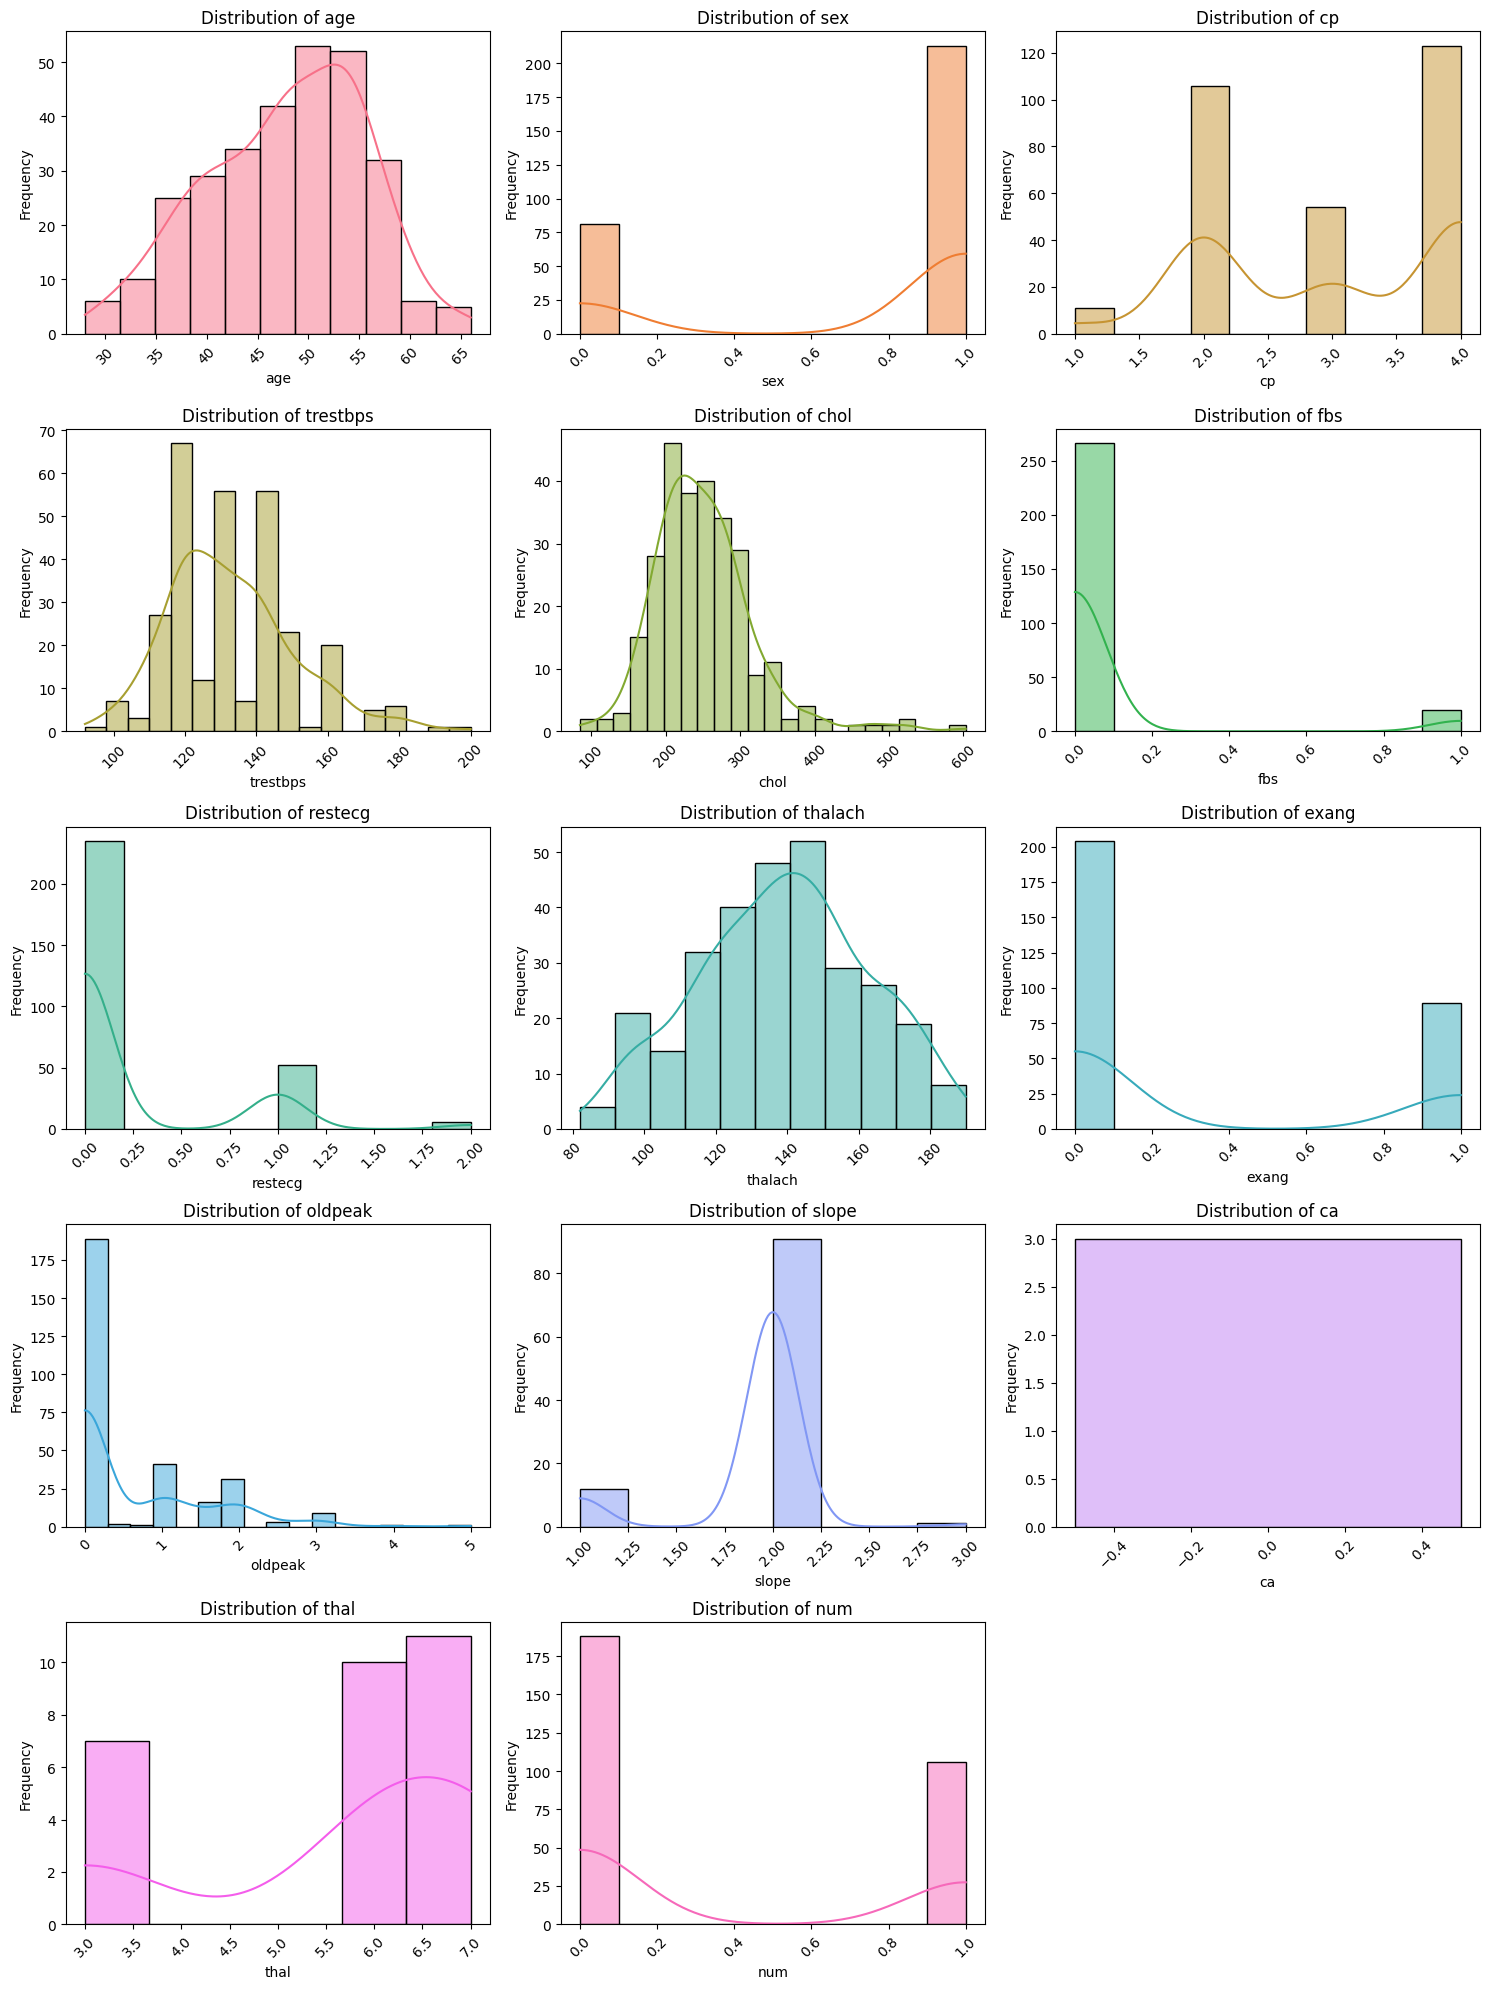

In [ ]:
# Distribution of Numeric Feature
num_cols = 3
num_features = len(df.columns)
num_rows = -(-num_features // num_cols)
plt.figure(figsize=(5 * num_cols, 4 * num_rows))
colors = sns.color_palette("husl", len(df.columns))

for i, (col, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color=color)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

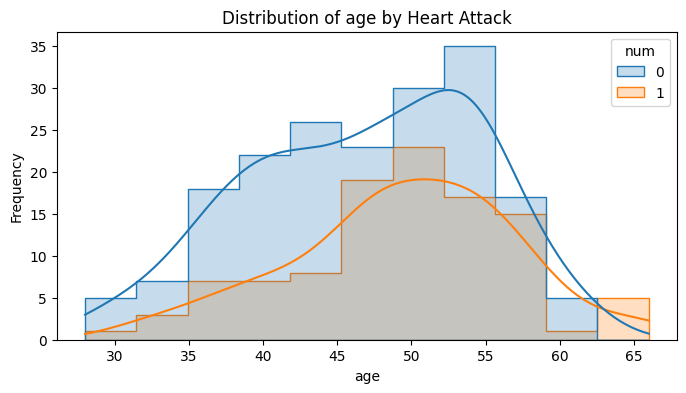

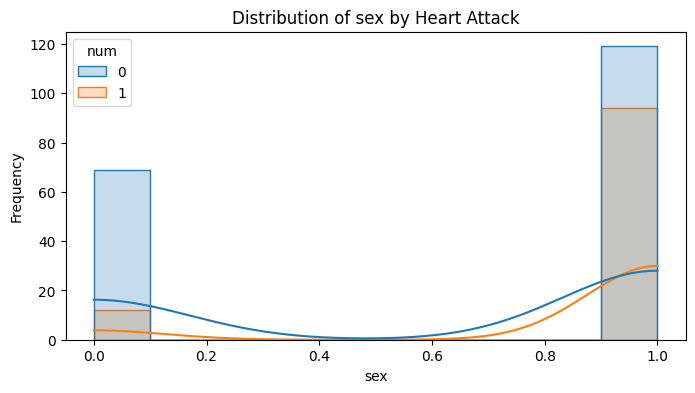

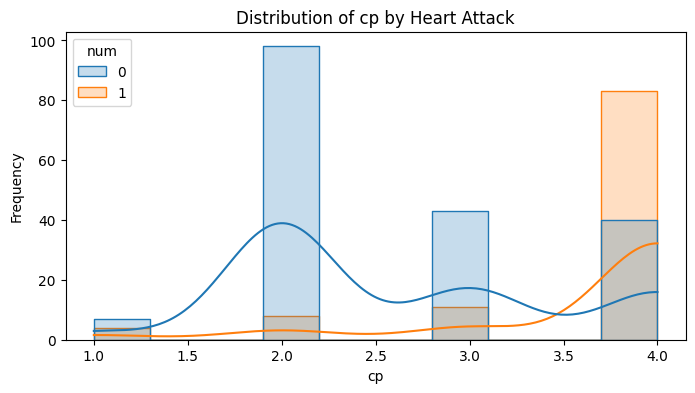

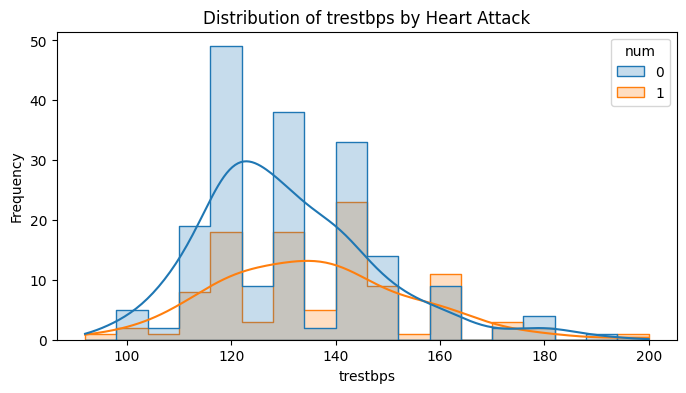

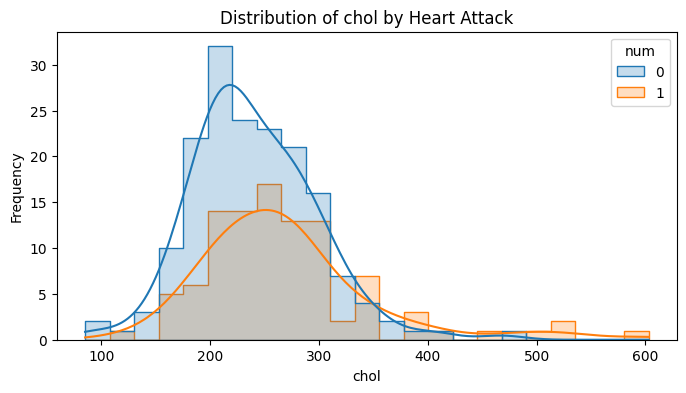

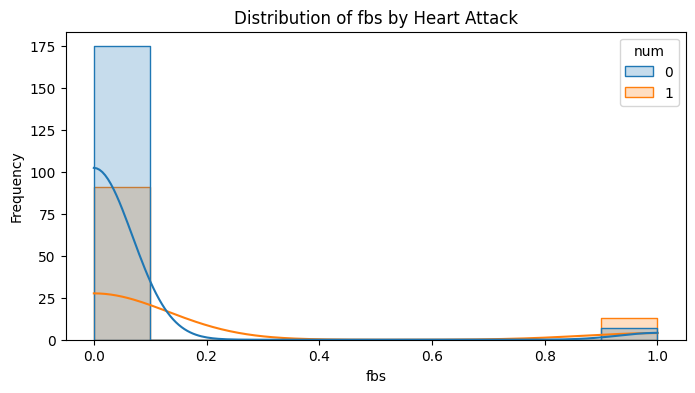

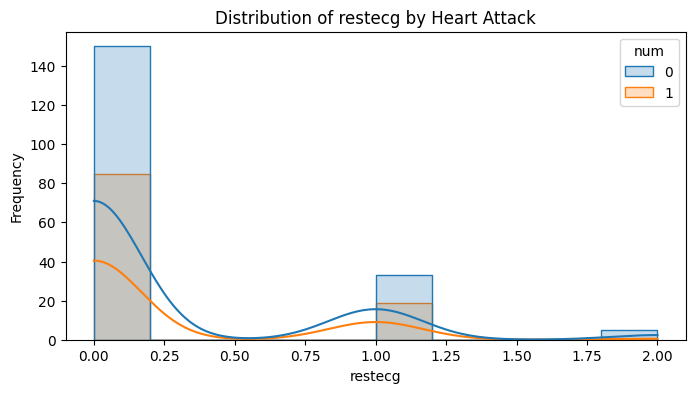

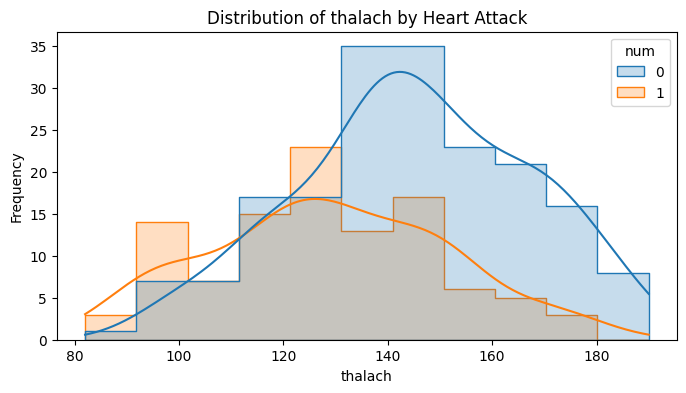

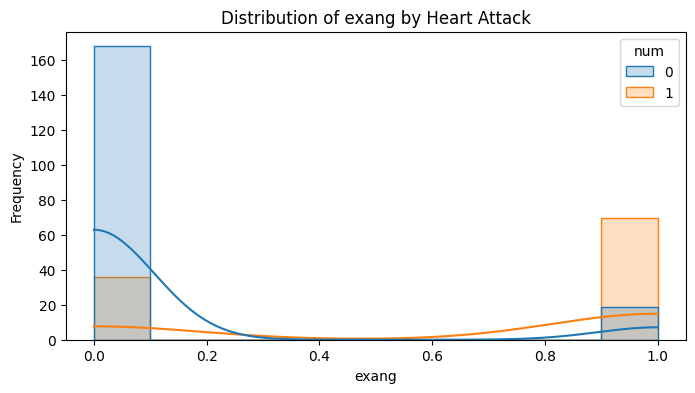

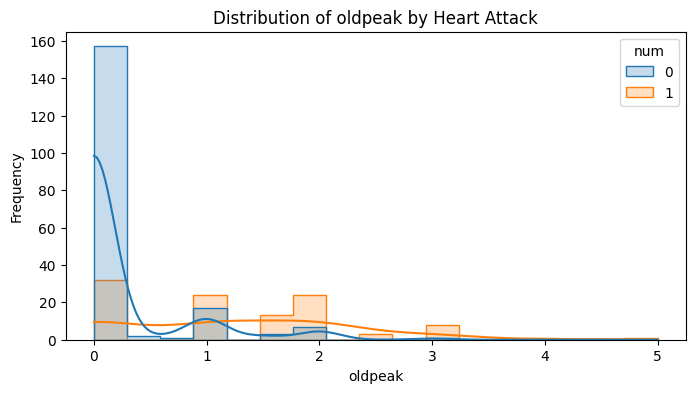

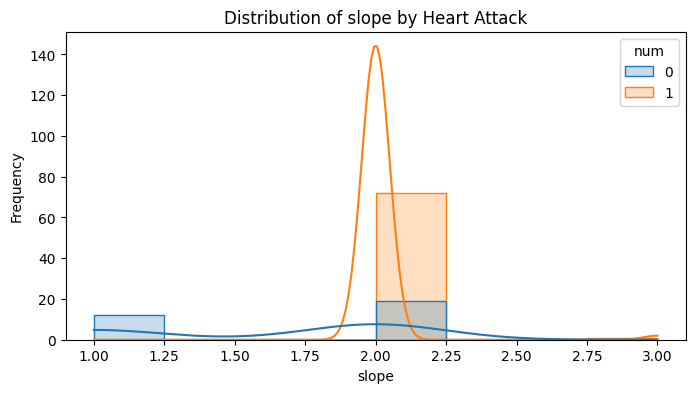

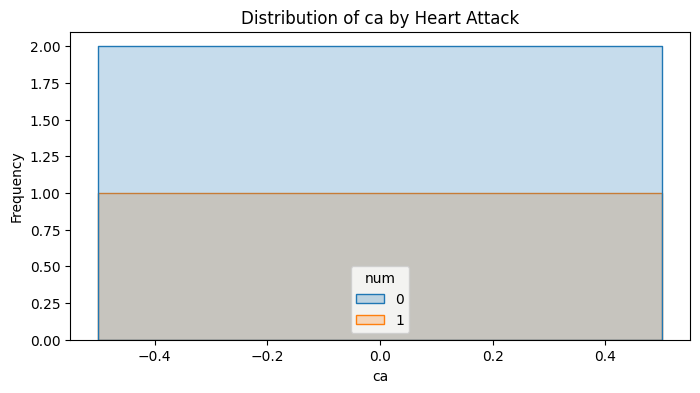

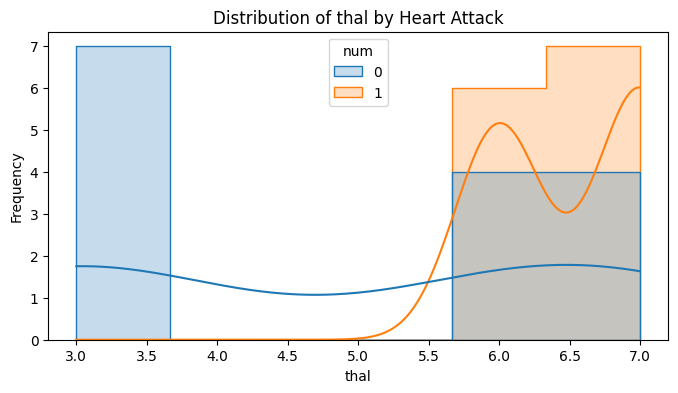

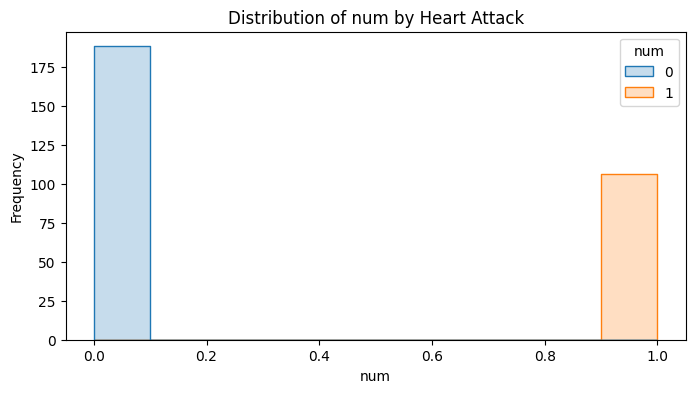

In [ ]:
# Distribution of Numeric Feature by Heart Attack
for feature in df.columns:
    plt.figure(figsize=(8, 4))

    # Check if the column has enough variance for KDE calculation
    if df[feature].std() > 0:  # Or a suitable threshold
        sns.histplot(data=df, x=feature, hue='num', element='step', kde=True, common_norm=False)
    else:
        sns.histplot(data=df, x=feature, hue='num', element='step', kde=False, common_norm=False)
        print(f"Warning: KDE disabled for {feature} due to low variance.")  # Inform the user

    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Heart Attack')
    plt.show()

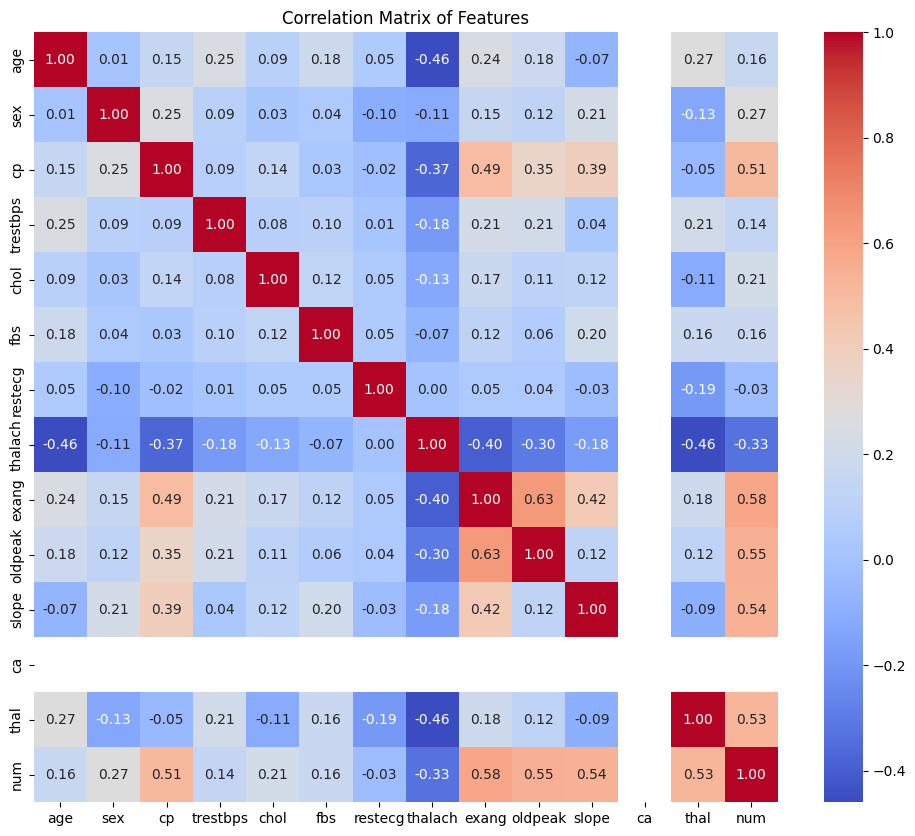

In [ ]:
# Correlation Matrix
correlation_matrix = df[df.columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

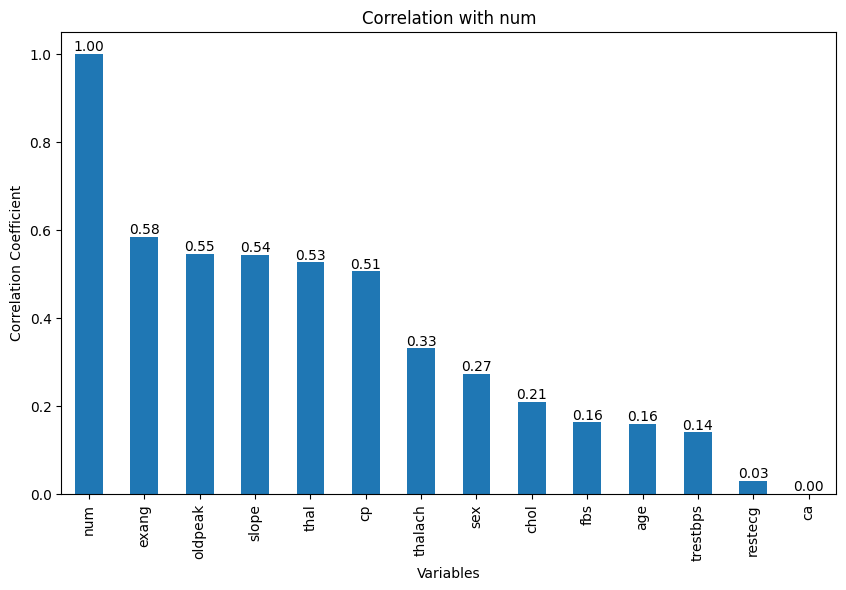

In [ ]:
target_corr = df.corr()['num']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = target_corr_sorted.plot(kind='bar')
plt.title('Correlation with num')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}',
             ha='center', va='bottom')

plt.show()

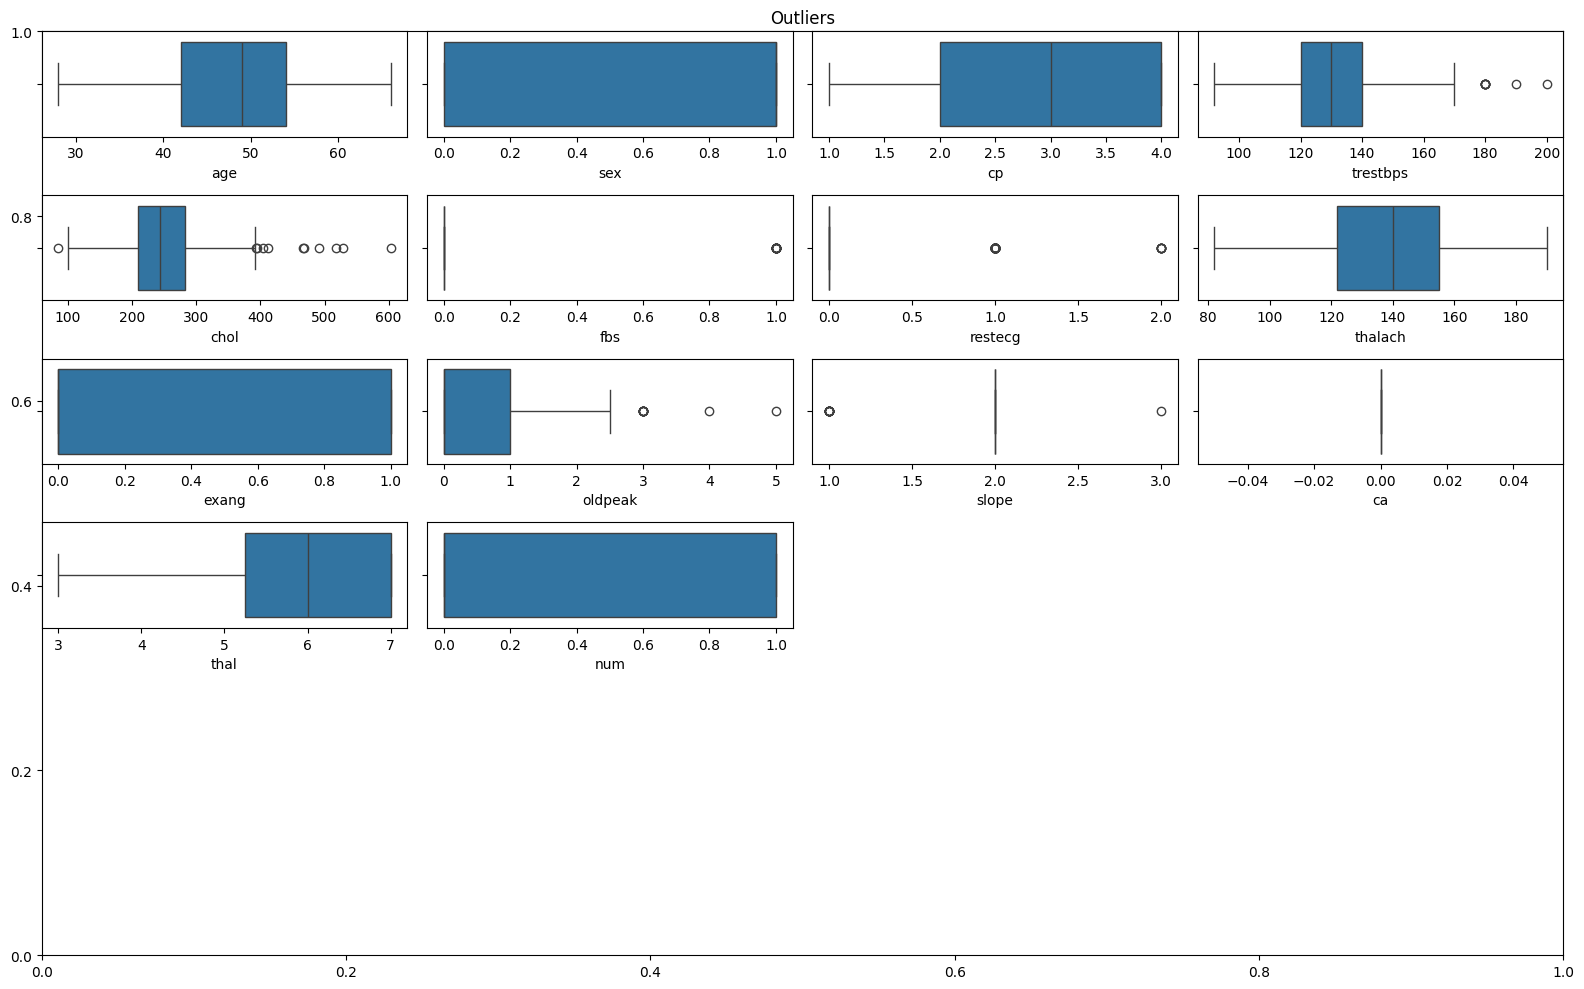

In [ ]:
# Calculate IQR for each numeric column
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(16,10))
plt.title("Outliers")
for i, feature in enumerate(df.columns, 1):
  plt.subplot(6, 4, i)
  sns.boxplot(x=df[feature])
plt.tight_layout()
plt.show()

**Summary**
1.   Ketidakseimbangan Data Label → Terdapat imbalance dalam data label yang dapat menyebabkan oversampling atau undersampling.
2.   Variasi pada Data Numerik → Fitur numerik memiliki distribusi yang cukup bervariasi.
3.   Outliers → Beberapa fitur seperti 'trestbps', 'chol', dan 'oldpeak' menunjukkan adanya outliers yang perlu dianalisis lebih lanjut.
4.   Potensi Underfitting/Overfitting → Poin 1-3 dapat menyebabkan underfitting atau overfitting jika tidak ditangani dengan baik.
5.   Missing Values pada 'slope', 'ca', dan 'thal' → Fitur ini memiliki banyak missing values, sehingga saat proses EDA, ada dua opsi:
  *   Menghadirkannya kembali dengan memberikan nilai yang relevan agar model dapat menggeneralisasi pengaruh fitur tersebut terhadap "heart attack".
  *   Menghapusnya untuk mengurangi potensi ketidakrelevanan fitur dalam analisis.

---

##**Insight of EDA**


Berdasarkan proses EDA yang telah dilakukan, maka jawaban atas masalah bisnis adalah:


1.   **Apa faktor-faktor utama yang memengaruhi risiko serangan jantung berdasarkan data pasien?**
     
     Fitur selain 'trestbps', 'chol', 'oldpeak', 'exang,'thal', dan 'cp' menunjukan pengaruh yang cukup seimbang dibanding dengan kelima fitur tersebut dikarenakan banyaknya missing values dan potensi mengakibatkan efek ketergantungan terhadap kelima fitur tersebut.

2.   **Apakah model prediktif dapat membantu dokter dalam mengidentifikasi pasien berisiko tinggi?**

     EDA mengungkapkan hubungan potensial antara fitur dan risiko serangan jantung, menunjukkan peluang untuk mengembangkan model prediktif guna mengidentifikasi pasien berisiko tinggi. Namun, diperlukan preprocessing dan pengembangan model lebih lanjut untuk memvalidasi hipotesis ini.
3.   **Apakah data yang tersedia cukup untuk membangun model yang akurat?**

     Secara jumlah, terdapat ketidakseimbangan antara variabel target "ya" dan "tidak". Selain itu, ada tiga fitur dengan jumlah missing value yang cukup banyak. Jumlah total dataset sekitar 294, yang tergolong kecil untuk melatih model agar dapat meningkatkan generalisasi terhadap data uji.

##**Preprocessing**

In [ ]:
# Remove features that have excessive missing values
df = df.drop(missing_percentage[missing_percentage > 10].index, axis=1)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

In [ ]:
# Replace missing values with median
columns_to_impute = missing_percentage[missing_percentage < 10].index

for column in columns_to_impute:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.4 KB


In [ ]:
# Checking for duplicate data
print('Data duplicated is:')
display(df[df.duplicated()])
df.drop_duplicates(inplace=True)

Data duplicated is:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
102,49,0,2,110.0,243.0,0.0,0.0,160.0,0.0,0.0,0


##Training Model

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(7)] before, using random point [np.int64(3)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6)] before, using random point [np.int64(9)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(7)] before, using random point [np.int64(2)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(4)] before, using random point [np.int64(10)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(6)] before, using random point [np.int64(5)]
  warnings.

Best KNN params (based on recall): OrderedDict([('n_neighbors', 3)])
Best recall score (KNN): 0.75


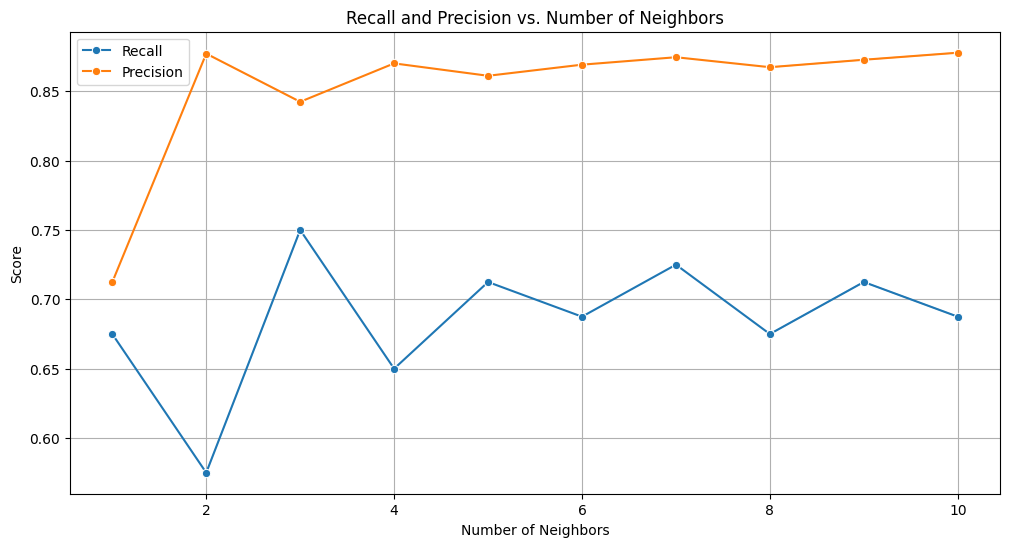

In [ ]:
# Best params for KNN
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score

scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

knn_search = BayesSearchCV(
    estimator=KNeighborsClassifier(),
    search_spaces={'n_neighbors': (1, 10)},
    n_iter=20,
    cv=5,
    scoring=scoring,
    refit='recall',
    random_state=42,
    verbose=0
)

knn_search.fit(X_train, y_train)

print("Best KNN params (based on recall):", knn_search.best_params_)
print("Best recall score (KNN):", knn_search.best_score_)

results = knn_search.cv_results_

plt.figure(figsize=(12, 6))
sns.lineplot(x=results['param_n_neighbors'], y=results['mean_test_recall'], label='Recall', marker='o')
sns.lineplot(x=results['param_n_neighbors'], y=results['mean_test_precision'], label='Precision', marker='o')
plt.title('Recall and Precision vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
knn_search.best_params_

OrderedDict([('n_neighbors', 3)])

/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(2), np.int64(20)] before, using random point [np.int64(6), np.int64(13)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(2), np.int64(20)] before, using random point [np.int64(7), np.int64(10)]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(2), np.int64(20)] before, using random point [np.int64(7), np.int64(11)]
  warnings.warn(


Best Random Forest params (based on recall): OrderedDict([('max_depth', 2), ('n_estimators', 20)])
Best recall score (Random Forest): 0.725


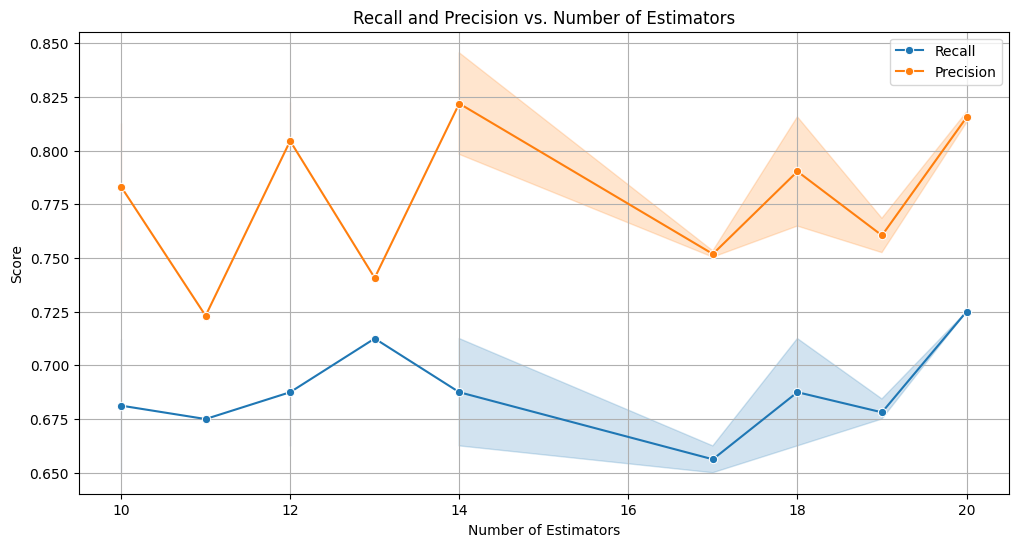

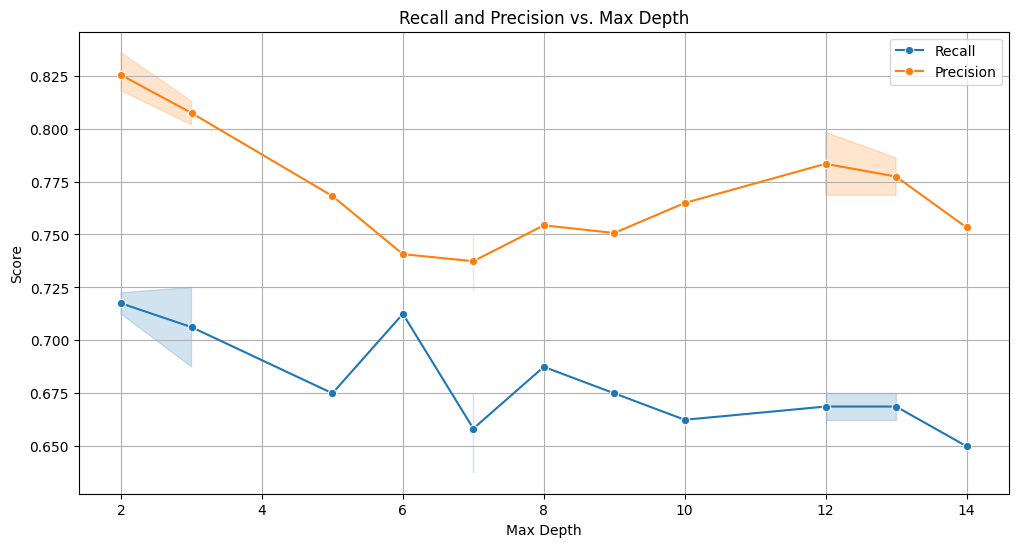

In [ ]:
# Best params for Random Forest
scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

randomForest_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces={
        'n_estimators': (10, 20),
        'max_depth': (2, 15)
    },
    n_iter=20,
    cv=5,
    scoring=scoring,
    refit='recall',
    random_state=42,
    verbose=0
)

randomForest_search.fit(X_train, y_train)

print("Best Random Forest params (based on recall):", randomForest_search.best_params_)
print("Best recall score (Random Forest):", randomForest_search.best_score_)

results = randomForest_search.cv_results_

plt.figure(figsize=(12, 6))
sns.lineplot(x=results['param_n_estimators'], y=results['mean_test_recall'], label='Recall', marker='o')
sns.lineplot(x=results['param_n_estimators'], y=results['mean_test_precision'], label='Precision', marker='o')
plt.title('Recall and Precision vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=results['param_max_depth'], y=results['mean_test_recall'], label='Recall', marker='o')
sns.lineplot(x=results['param_max_depth'], y=results['mean_test_precision'], label='Precision', marker='o')
plt.title('Recall and Precision vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
randomForest_search.best_params_

OrderedDict([('max_depth', 2), ('n_estimators', 20)])

In [ ]:
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'RandomForest': RandomForestClassifier(max_depth=2, n_estimators=20)
}

In [ ]:
x_numerik = X.drop(columns=['sex'])

Q1 = x_numerik.quantile(0.25)
Q3 = x_numerik.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition_outlier = ((x_numerik < lower_bound) | (x_numerik > upper_bound))

print("\nBaris-baris yang memiliki outliers:")
for column in x_numerik.columns:
    outlier_rows = x_numerik[condition_outlier[column]]
    if not outlier_rows.empty:
        print(f"\nOutliers pada kolom '{column}':")
        display(outlier_rows)


Baris-baris yang memiliki outliers:

Outliers pada kolom 'trestbps':


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
35,39,2,190.0,241.0,0.0,0.0,106.0,0.0,0.0
72,45,2,180.0,243.0,0.0,0.0,180.0,0.0,0.0
84,46,4,180.0,280.0,0.0,1.0,120.0,0.0,0.0
172,57,4,180.0,347.0,0.0,1.0,126.0,1.0,0.8
181,59,3,180.0,213.0,0.0,0.0,100.0,0.0,0.0
245,54,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0
266,53,4,180.0,285.0,0.0,1.0,120.0,1.0,1.5
292,58,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0



Outliers pada kolom 'chol':


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
70,44,4,150.0,412.0,0.0,0.0,170.0,0.0,0.0
128,52,2,140.0,100.0,0.0,0.0,138.0,1.0,0.0
131,53,2,113.0,468.0,0.0,0.0,127.0,0.0,0.0
158,55,2,130.0,394.0,0.0,2.0,150.0,0.0,0.0
170,56,4,120.0,85.0,0.0,0.0,140.0,0.0,0.0
197,40,4,120.0,466.0,0.0,0.0,152.0,1.0,1.0
225,32,4,118.0,529.0,0.0,0.0,130.0,0.0,0.0
228,40,4,150.0,392.0,0.0,0.0,130.0,0.0,2.0
243,54,4,130.0,603.0,1.0,0.0,125.0,1.0,1.0
263,52,4,140.0,404.0,0.0,0.0,124.0,1.0,2.0



Outliers pada kolom 'fbs':


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
37,39,3,160.0,147.0,1.0,0.0,160.0,0.0,0.0
74,45,2,140.0,224.0,1.0,0.0,122.0,0.0,0.0
89,47,4,140.0,276.0,1.0,0.0,125.0,1.0,0.0
91,48,2,120.0,243.0,1.0,1.0,148.0,0.0,0.0
141,54,2,120.0,230.0,1.0,0.0,140.0,0.0,0.0
159,55,2,120.0,256.0,1.0,0.0,137.0,0.0,0.0
173,57,2,140.0,260.0,1.0,0.0,140.0,0.0,0.0
206,48,4,106.0,263.0,1.0,0.0,110.0,0.0,0.0
221,59,4,130.0,338.0,1.0,1.0,130.0,1.0,1.5
224,65,4,140.0,306.0,1.0,0.0,87.0,1.0,1.5



Outliers pada kolom 'restecg':


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,28,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0
3,30,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0
4,31,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0
10,34,2,150.0,214.0,0.0,1.0,168.0,0.0,0.0
12,35,1,120.0,160.0,0.0,1.0,185.0,0.0,0.0
14,35,2,120.0,308.0,0.0,2.0,180.0,0.0,0.0
22,37,4,130.0,173.0,0.0,1.0,184.0,0.0,0.0
23,37,2,130.0,283.0,0.0,1.0,98.0,0.0,0.0
30,39,3,110.0,182.0,0.0,1.0,180.0,0.0,0.0
31,39,2,120.0,243.0,0.0,1.0,146.0,0.0,2.0



Outliers pada kolom 'oldpeak':


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
137,53,4,124.0,260.0,0.0,1.0,112.0,1.0,3.0
192,36,2,120.0,267.0,0.0,0.0,160.0,0.0,3.0
218,55,4,140.0,201.0,0.0,0.0,130.0,1.0,3.0
234,48,4,160.0,193.0,0.0,0.0,102.0,1.0,3.0
248,57,4,150.0,255.0,0.0,0.0,92.0,1.0,3.0
253,44,2,150.0,288.0,0.0,0.0,150.0,1.0,3.0
264,52,4,160.0,246.0,0.0,1.0,82.0,1.0,4.0
279,41,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0
283,47,4,160.0,291.0,0.0,1.0,158.0,1.0,3.0
286,50,4,140.0,231.0,0.0,1.0,140.0,1.0,5.0


Accuracy: 0.7614
Precision: 0.5862
Recall: 0.6538
F1-score: 0.6182


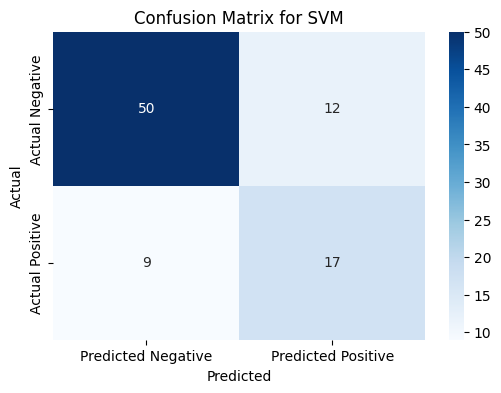

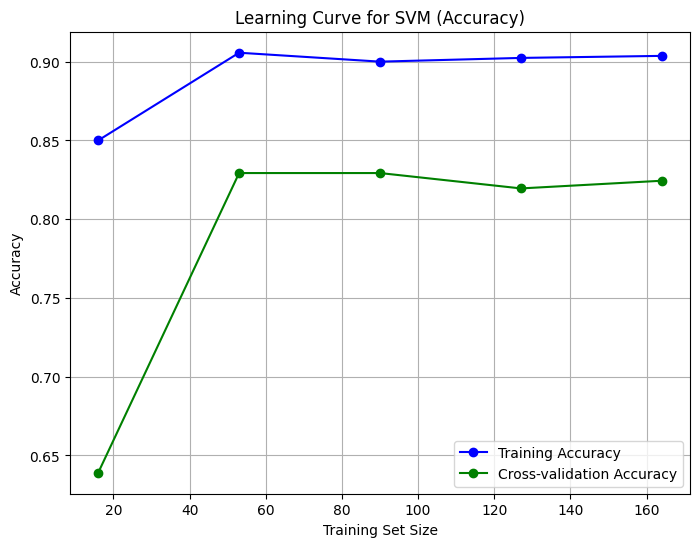

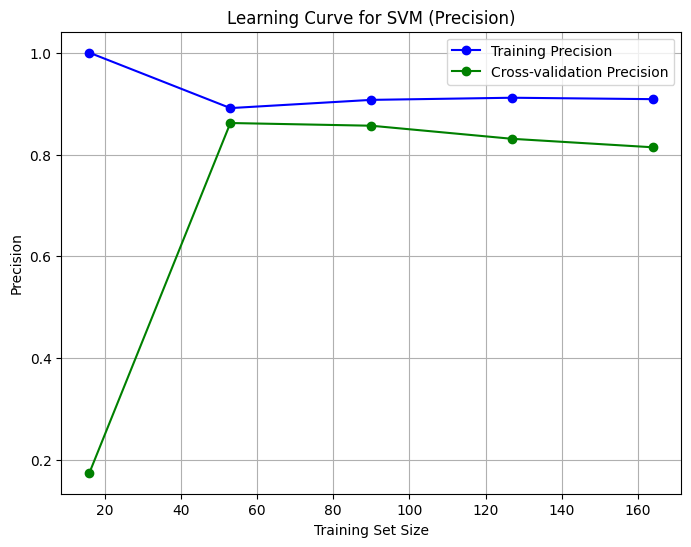

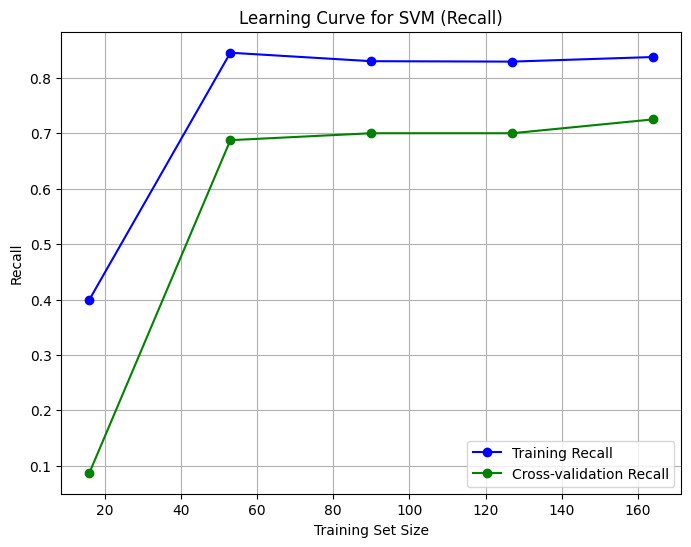

Accuracy: 0.7841
Precision: 0.6400
Recall: 0.6154
F1-score: 0.6275


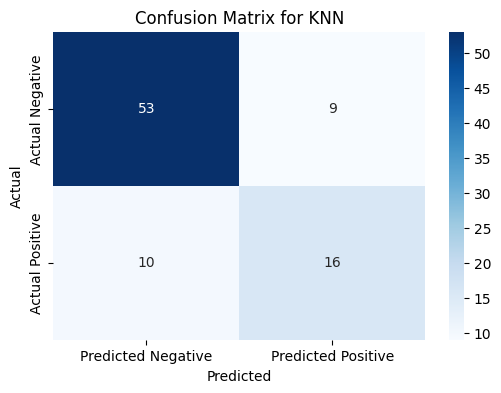

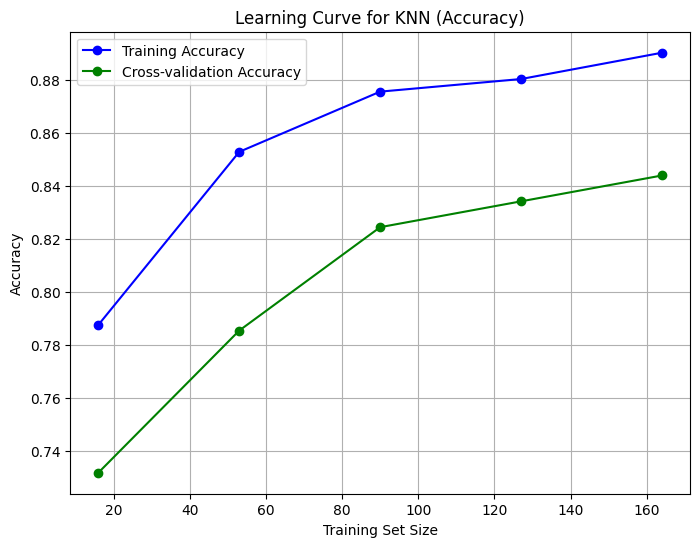

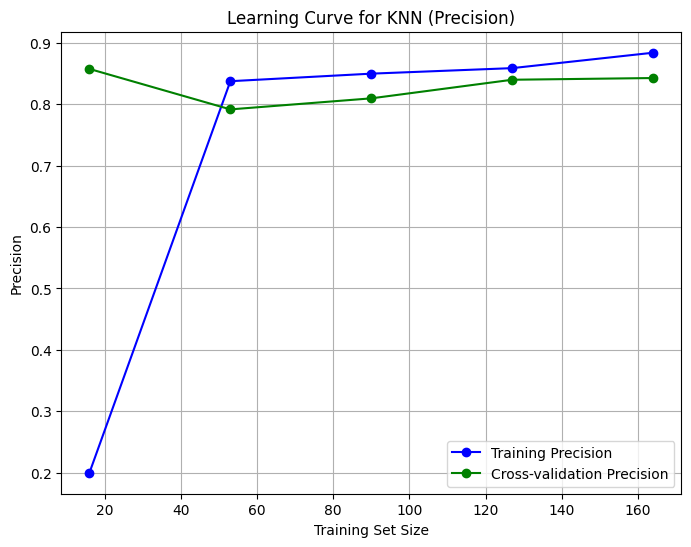

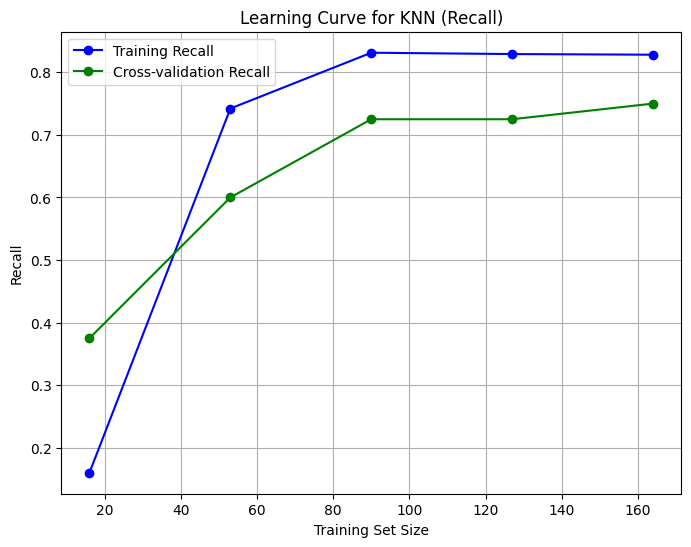

Accuracy: 0.8295
Precision: 0.7391
Recall: 0.6538
F1-score: 0.6939


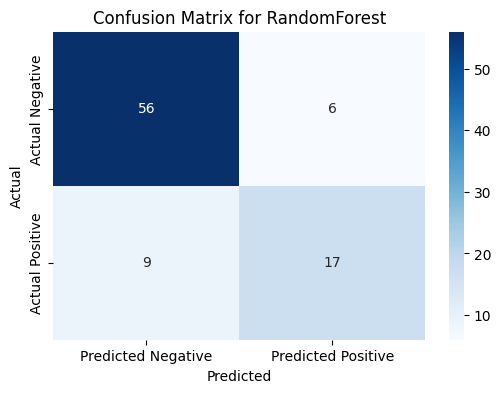

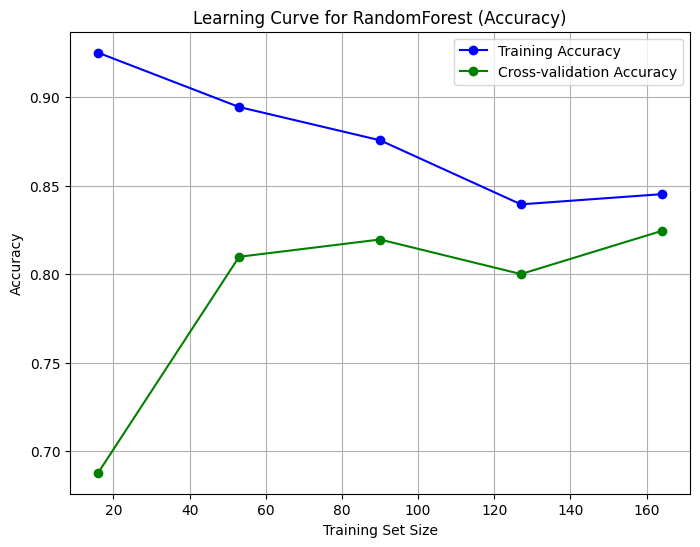

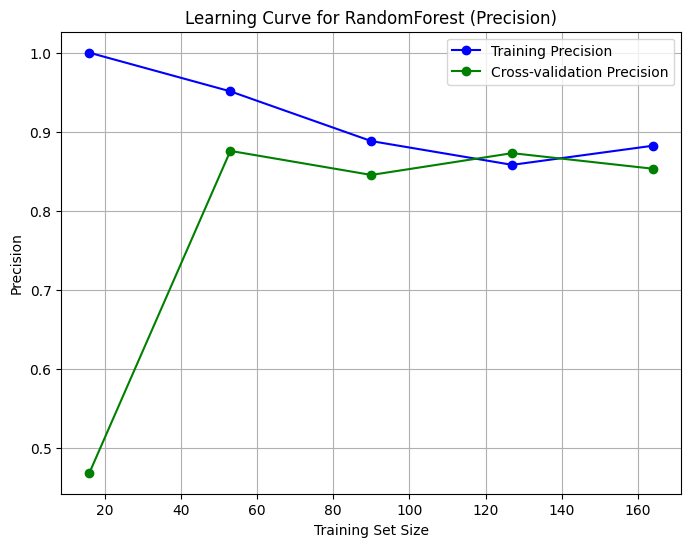

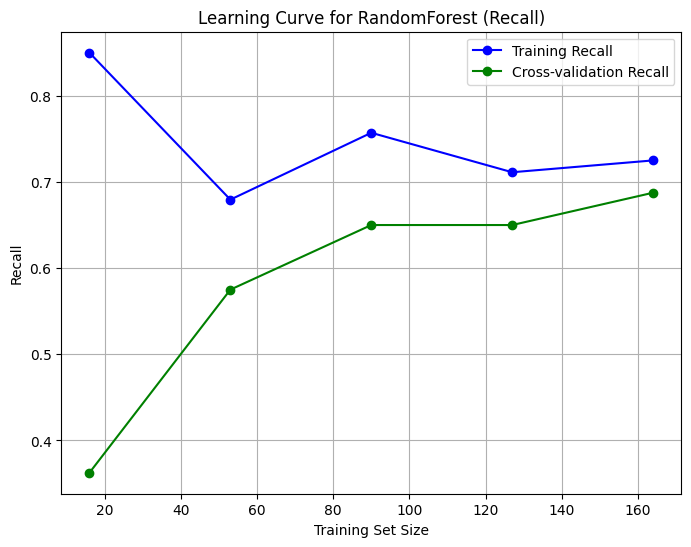

In [ ]:
for i, (name, model) in enumerate(models.items(), start=1):
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_test, y_test)

    display(HTML(f"<b>\n{i}. {name}"))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Visualization of Confusion Matrix
    plot_confusion_matrix(cm, name)

    # Counting the learning curve of accuration, precision, and recall
    train_sizes, train_scores_accuracy, test_scores_accuracy = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    train_sizes, train_scores_precision, test_scores_precision = learning_curve(model, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
    train_sizes, train_scores_recall, test_scores_recall = learning_curve(model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)

    # Mean
    train_mean_accuracy = np.mean(train_scores_accuracy, axis=1)
    test_mean_accuracy = np.mean(test_scores_accuracy, axis=1)

    train_mean_precision = np.mean(train_scores_precision, axis=1)
    test_mean_precision = np.mean(test_scores_precision, axis=1)

    train_mean_recall = np.mean(train_scores_recall, axis=1)
    test_mean_recall = np.mean(test_scores_recall, axis=1)

    # Plot learning curve for accuration
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean_accuracy, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean_accuracy, 'o-', color="green", label="Cross-validation Accuracy")
    plt.title(f"Learning Curve for {name} (Accuracy)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot learning curve for precision
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean_precision, 'o-', color="blue", label="Training Precision")
    plt.plot(train_sizes, test_mean_precision, 'o-', color="green", label="Cross-validation Precision")
    plt.title(f"Learning Curve for {name} (Precision)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot learning curve for recall
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean_recall, 'o-', color="blue", label="Training Recall")
    plt.plot(train_sizes, test_mean_recall, 'o-', color="green", label="Cross-validation Recall")
    plt.title(f"Learning Curve for {name} (Recall)")
    plt.xlabel("Training Set Size")
    plt.ylabel("Recall")
    plt.legend()
    plt.grid()
    plt.show()

#**Conclusion**

Pada masalah yang ada yaitu heart attack prediction. Saya mendapatkan bahwa Random Forest cukup untuk menangani kasus data sedikit dan robust terhadap outliers. Dengan harapan evaluasi model berfokus terhadap presisi dan recall sebab tujuannya adalah untuk mengantisipasi terjadinya serangan jantung berdasarkan rekam medis yang diberikan.